# 2D Neural Style Transfer

This is the Jupyter Notebook for 2D NST.

## Step 0: imports

In [5]:
import torch

# install KeOps kernels
!pip install -q pykeops==1.4.1 > install.log

# install pytorch version of np.Interp, which is used for histogram loss
!pip install -q git+https://github.com/aliutkus/torchinterp1d.git

# import self-defined functions
!git clone https://github.com/wmd0701/MA.git .
from utils.data_loader import image_loader, image_unloader
from utils.pipeline import pipeline_2D_NST
from utils.plot import plot_losses_2D_NST

# better plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Step 1: load images

torch.Size([1, 3, 256, 384])


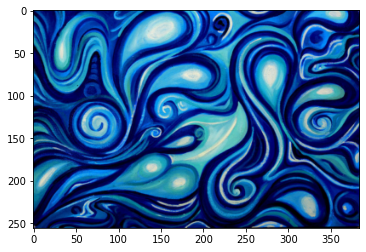

torch.Size([1, 3, 256, 256])


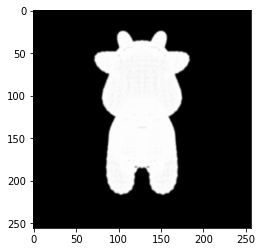

In [7]:
style_img = image_loader("image_style/blue_swirls.jpg", imsize=256, tiling=1)
content_img = image_loader("image_content/sil_cow_grayscale.png", imsize=256)

print(style_img.shape)
imshow(image_unloader(style_img));show()
print(content_img.shape)
imshow(image_unloader(content_img))

## Step 2: run NST pipeline

In [ ]:
style_layers = ['conv1_1', 'conv2_1', 'conv3_1', 'conv4_1']
style_weights = [1e6/n**2 for n in [64,128,256,512]]

content_layers = ['conv4_2']
content_weights = [1]

model_pooling = 'max'
mask_pooling = 'avg'
n_iters = 200
learning_rate = 1
need_content = False

# types of style losses to be considered
style_loss_types = {'gram':1,
                    #'bnst':1,
                    #'morest':1e-1,
                    #'histo':1,
                    #'linear':1,
                    #'poly':1,
                    #'rbf':1e2,
                    }

# input image tensor
# input_img = torch.rand(style_img.shape, device=input_img.device)
input_img = torch.rand(content_img.shape, device=content_img.device)
# input_img = content_img.clone()

# masking
mask_img = None # image_loader("image_content/sil_cow_grayscale.png", imsize = input_img.shape[-2:], mask = True)
masking = False

output_img, loss_history = pipeline_2D_NST( style_img = style_img, 
                                            content_img = content_img,
                                            input_img = input_img,
                                            mask_img = mask_img,
                                            n_iters = n_iters,
                                            style_weights = style_weights,
                                            content_weights = content_weights,
                                            style_layers = style_layers,
                                            content_layers = content_layers,
                                            style_loss_types = style_loss_types,
                                            learning_rate = learning_rate,
                                            need_content = need_content,
                                            masking = masking,
                                            model_pooling = model_pooling,
                                            mask_pooling = mask_pooling,
                                            silent = False)
 

imshow(image_unloader(output_img))
gcf().set_size_inches(5,5)

## Step 3: loss plot

In [ ]:
plot_losses_2D_NST(loss_history, loss_name = None, start = 0, end = n_iters)